### Herman Ellingsrud, 299803

 # Assignment 4: Waves and grid staggering
 
In this assignemnt I will explore the shallow water equation, grid staggering and the effect of boundary conditions. The assignment is divided in two parts, the first part will focus on the coupled 1d equations for u and $\eta$, while the second part will focus on the wave equation.


## Method

## 1d coupled equations

We start with the coupled 1d equations for u and η, which are typically written:

\begin{equation}
\frac{\partial \eta}{\partial t} + H \frac{\partial u}{\partial x} = 0
\end{equation}

\begin{equation}
\frac{\partial u}{\partial t} + g \frac{\partial \eta}{\partial x} = 0
\end{equation}

where $\eta(x, t)$ represents sea surface elevation relative to a fixed depth $H = 100$ m, and u(x, t) represents
the velocity, and $g = 9.81$ m s$^{−1}$ is the gravitational constant. The model domain is 1 km wide, with
a grid spacing of $Δx = 5$ m. The initial condition is given as a smooth bump centered in the domain.

#### Non-staggered grid and a CTCS scheme:

\begin{equation}
\frac{\eta_i^{n+1}-\eta_i^{n-1}}{2 \Delta t} + H \frac{u_{i+1}^n-u_{i-1}^n}{2 \Delta x} = 0
\end{equation}

\begin{equation}
\frac{u_i^{n+1}-u_i^{n-1}}{2 \Delta t} + g \frac{\eta_{i+1}^n-\eta_{i-1}^n}{2 \Delta x} = 0
\end{equation}

\begin{align*}
\eta_{i}^{n+1} = \eta_{i}^{n-1} - H\frac{{\Delta t}}{{\Delta x}}(u_{i+1}^{n} - u_{i-1}^{n})
\end{align*}

\begin{align*}
u_{i}^{n+1} &= u_{i}^{n-1} - g\frac{{\Delta t}}{{\Delta x}}\left(\eta_{i+1}^{n} - \eta_{i-1}^{n}\right) 
\end{align*}

#### Staggered grid in time and space for a FTBS scheme:

\begin{equation}
u_{i+1/2}^{n+1} = u_{i+1/2}^n - \frac{g \Delta t}{\Delta x} (\eta_{i+1}^{n+1} - \eta_{i}^{n+1})
\end{equation}

\begin{equation}
\eta_{i}^{n+1} = \eta_{i}^n - \frac{H \Delta t}{\Delta x} (u_{i+1/2}^n - u_{i-1/2}^n)
\end{equation}


## Wave equation


#### CTCS:

\begin{equation}
    \eta^{n+2}_i - 2 \eta^n_i + \eta^{n-2}_{i} = \frac{gH(\Delta t)^2}{(\Delta x)^2}(\eta^{n}_{i+2} - 2 \eta^n_i + \eta^{n}_{i-2})
\end{equation}

#### FTCS:

\begin{equation}
    \eta^{n+1}_i - 2 \eta^n_i + \eta^{n-1}_{i} = \frac{gH(\Delta t)^2}{(\Delta x)^2}(\eta^{n}_{i+1} - 2 \eta^n_i + \eta^{n}_{i-1})
\end{equation}


## Grid staggering

Grid staggering is a technique to minimize the effective grid size, by shifting one of the grid points of the variables (Collins et al., 2013). By shifting one of the grid points of one variable in time, one can get a numerical solution with better preformance. The numercial solution gets more accurate because the effective grid size gets smaller, see skecth. When using this technique one of the variables is dependent on the updated value of the other variable. One can alo stagger one of the grid points of one variable in space. One variable will alså be more dependent on the updated value of the other variable. Staggering u and v components in their respective directions (x for u and y for v) allows for more accurate and straightforward calculation of derivatives and fluxes.

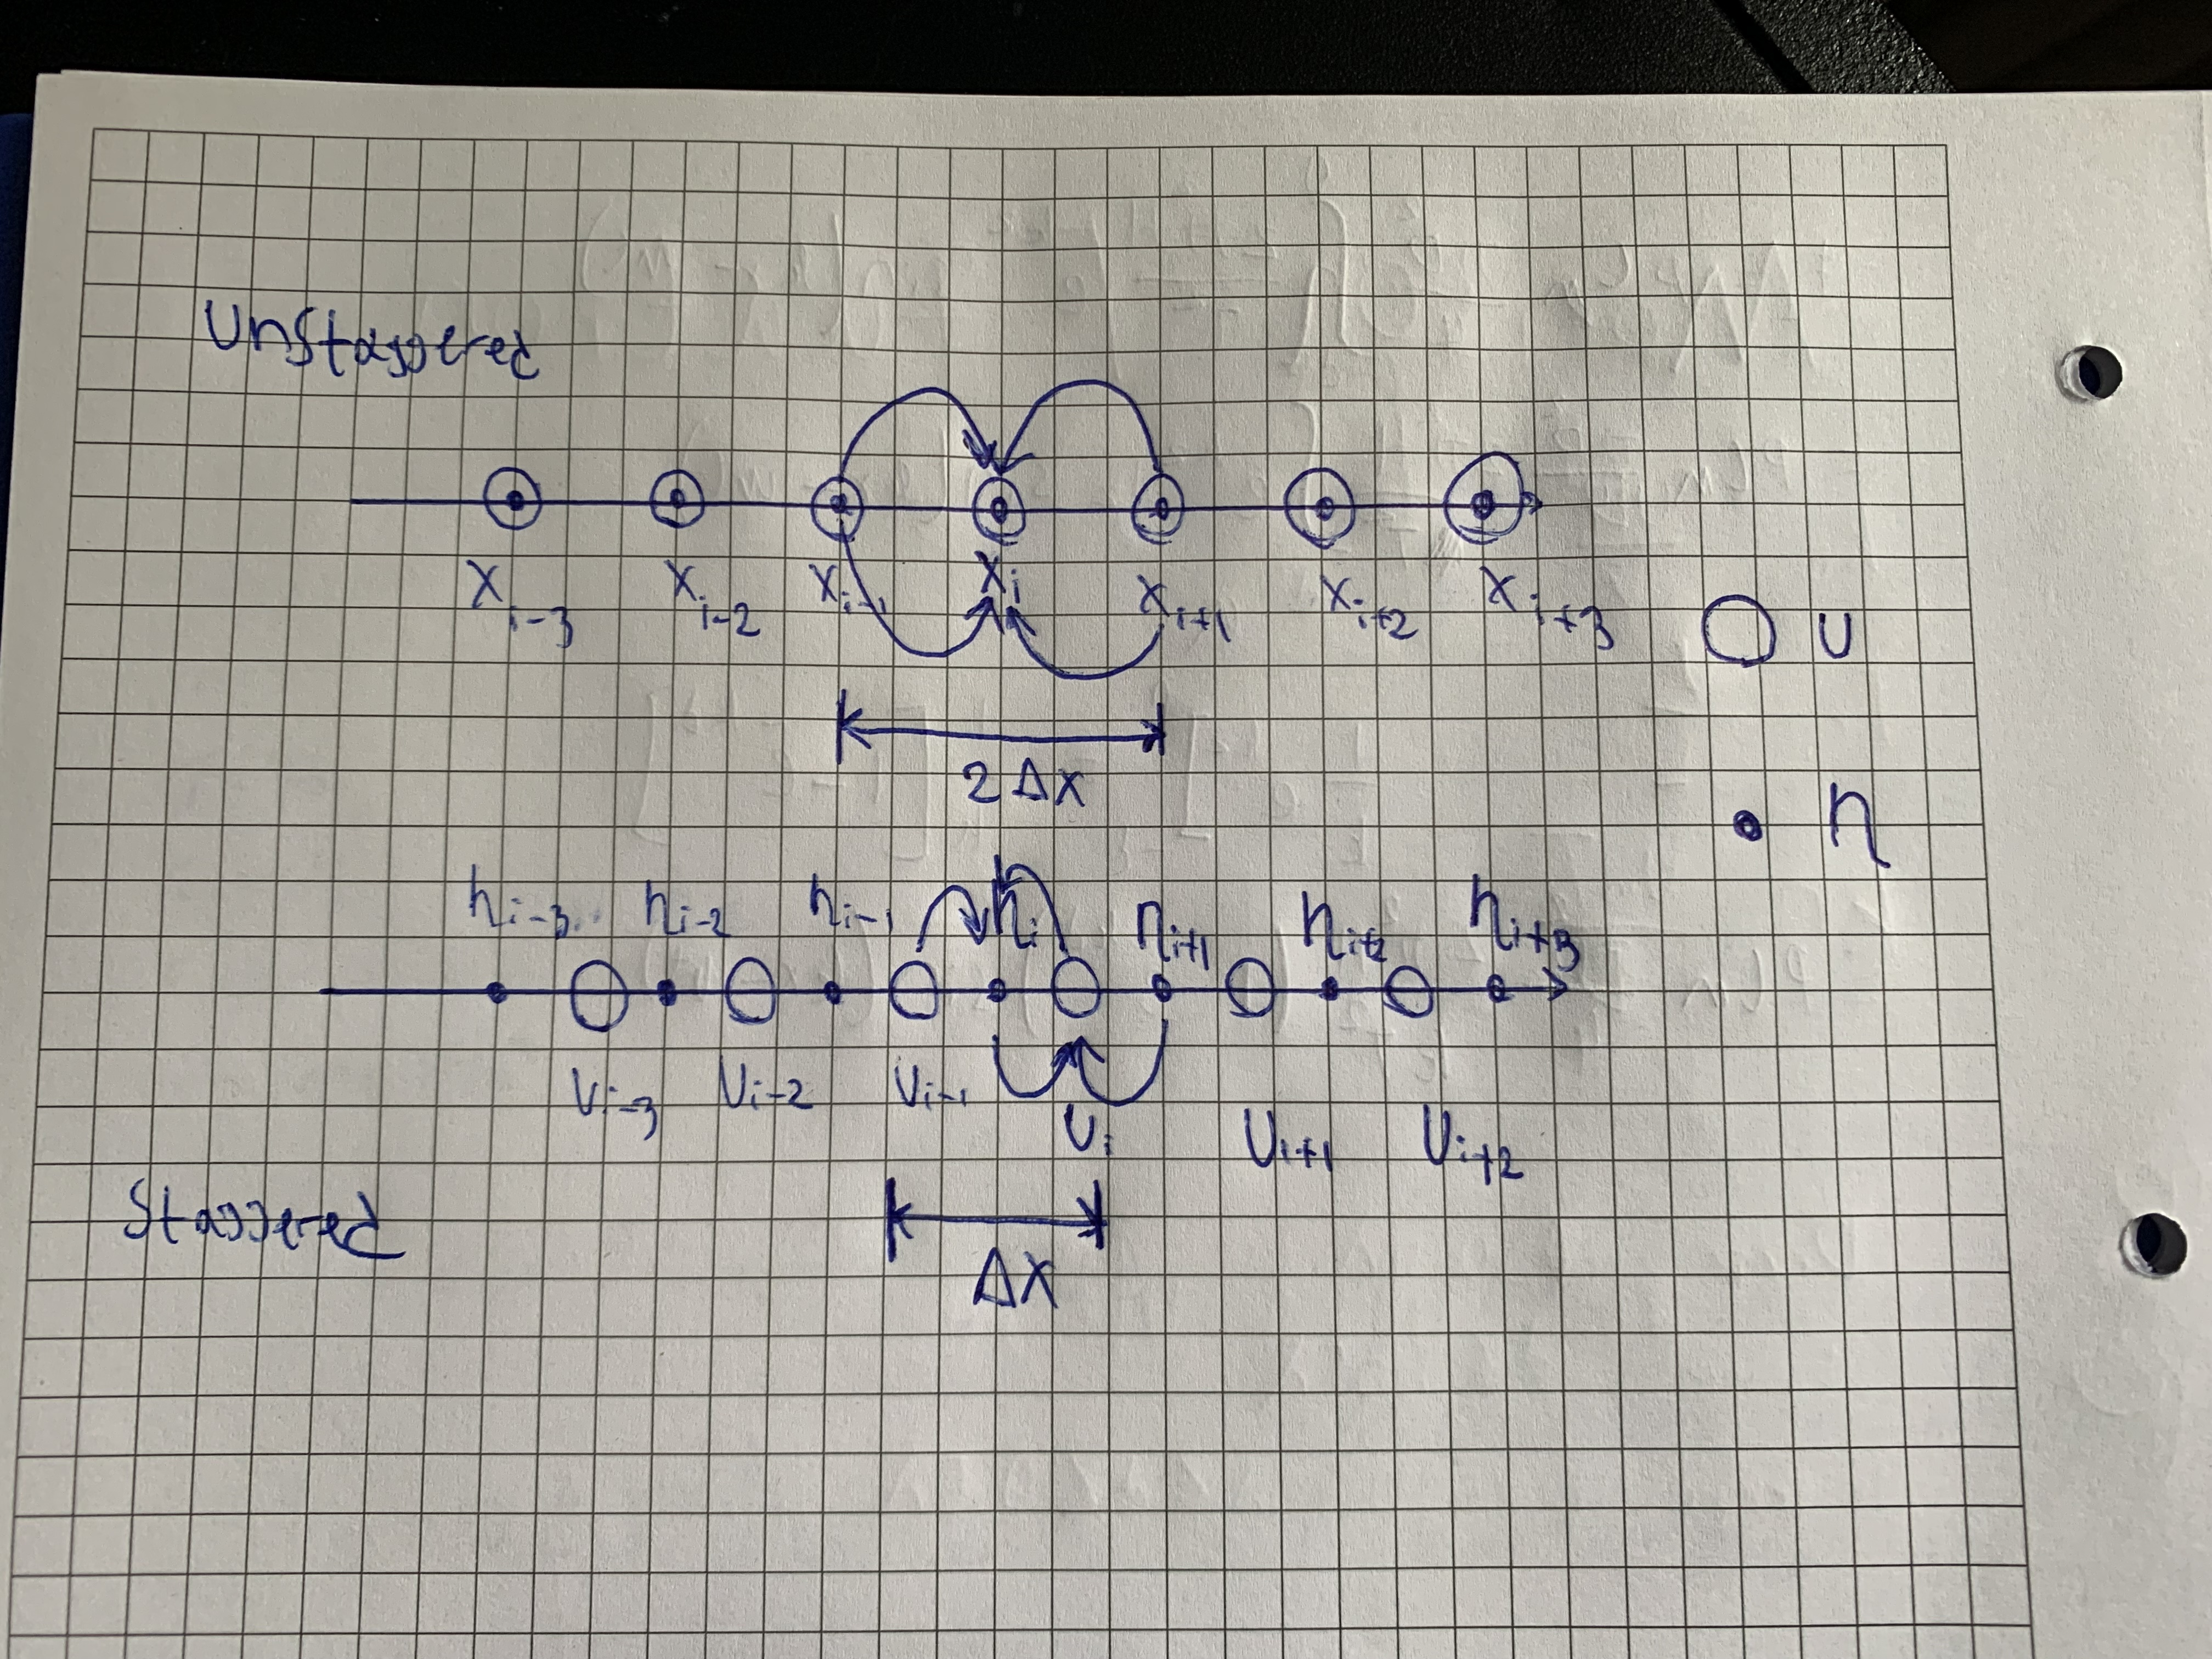

In [1]:
from IPython.display import display, Image

# Open the image file
image_path = "sketch.jpg"
image = Image(filename=image_path)

# Display the image
display(image)

## u and $\eta$ impact on each other

$\eta$ represents the sea surface elevation, and when there is a gradient in the sea surface elevation it will generate a pressure gradient that accelerates the fluid, therefore changing the velocity u. 

The divergence of the velocity field, u, causes changes in the water volume, ultimalty changing the sea surface elevation.


## CFL criteria

$\text{CFL} = \frac{\Delta t}{\Delta x} \cdot c \leq 1$

The Courant–Friedrichs–Lewy number is a measure of what fraction of a zone we cross per timestep (Zingale, 2021). In this assignment $\Delta x$ is given to be 5 m, and the c is the wave speed given by $c = \sqrt{gH} ≈ 31.32 m/s$ 
so to fulfill this criteria $\Delta t$ has to be equal to or less than 0.1597 s.   


## Large language model

The Large language model ChatGPT was used to resolve errors that occurd in my code. It was also used to get coding help, like how to move the legend out of the plot.


# Results

## Non-staggered CTCS

\begin{align*}
\eta_{i}^{n+1} = \eta_{i}^{n-1} - H\frac{{\Delta t}}{{\Delta x}}(u_{i+1}^{n} - u_{i-1}^{n})
\end{align*}

\begin{align*}
u_{i}^{n+1} &= u_{i}^{n-1} - g\frac{{\Delta t}}{{\Delta x}}\left(\eta_{i+1}^{n} - \eta_{i-1}^{n}\right) 
\end{align*}


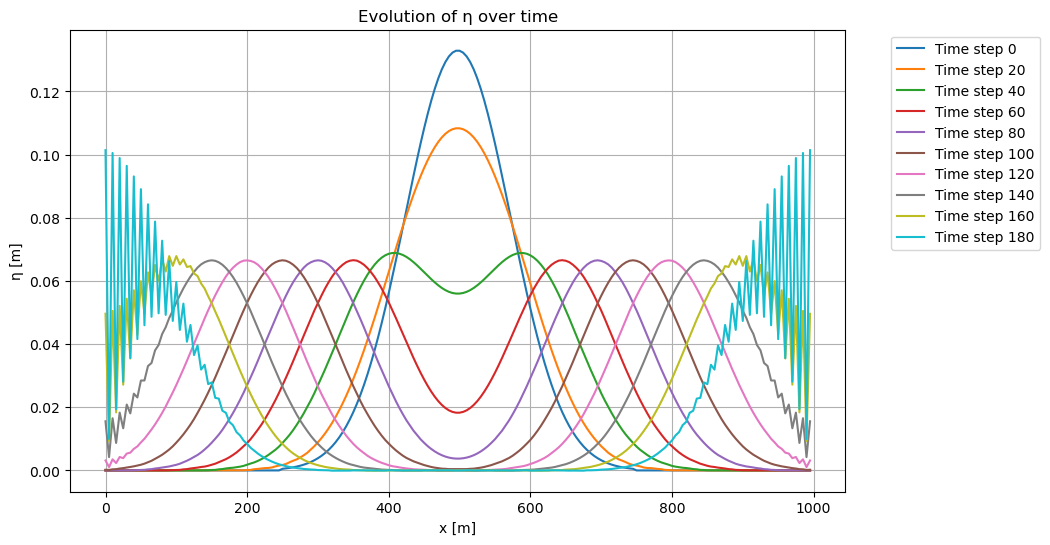

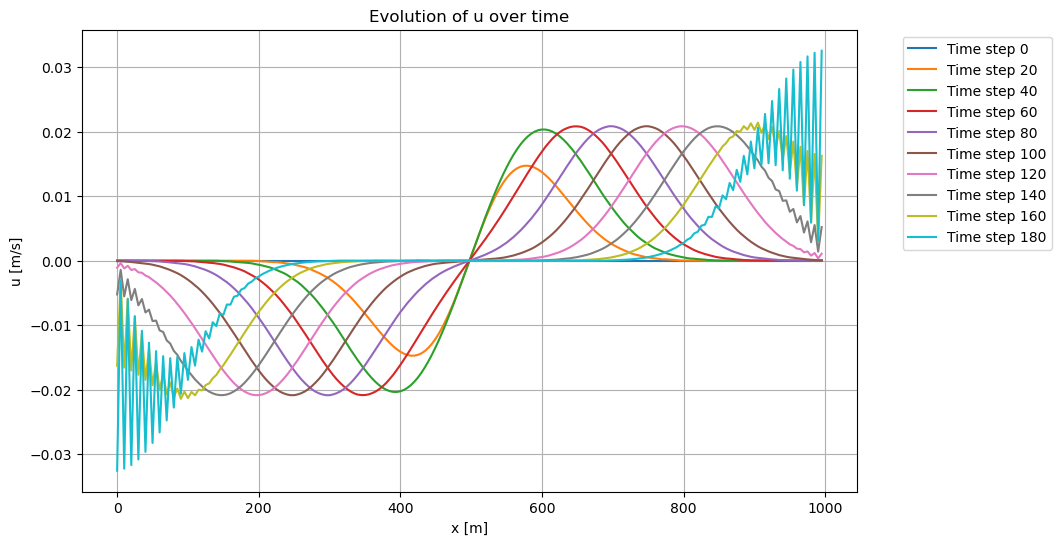

In [2]:
# Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define constants
dx = 5
dt = 0.08  # Time step less than critical
g = 9.81  # Acceleration due to gravity
H = 100  # Water depth

# Define space domain
x = np.arange(0, 1000, dx) # x is an array from zero to one thousand with 5 between each step
num_points = len(x) # length of the array, 200

# Initial condition for eta
eta0 = np.zeros(num_points) # defining the initial condition as zero for all 200 steps

# Gaussian wave
xbell = np.linspace(-10, 10, 100) # array from -10 to 10 with 100 steps between
ybell = stats.norm.pdf(xbell, 0, 3) # gives a shape
eta0[50:150] = ybell # defines where the shape will be in the initial condition

# Initial condition for u 
u0 = np.zeros(num_points) # makes an initial condition for u with the same length as eta0


# Time steps
num_steps = 200

# Arrays to store results
eta_values = np.zeros((num_steps, num_points)) # array in time and space domain
u_values = np.zeros((num_steps, num_points)) # array in time and space domain

# Initialize with initial conditions
eta_values[0] = eta0 
eta_values[1] = eta0 # i had to define the next value to make it work. 
u_values[0] = u0

# Non-staggered CTCS scheme
for n in range(2, num_steps):
    
    # Defining the first and last spcae step
    u_values[n, 0] = u_values[n-2, 0] - g * dt / dx * (eta_values[n-1, 1] - 0) # boundary for the first space steps
    eta_values[n,0] = eta_values[n-2, 0] - H * dt / dx * (u_values[n-1,1] - 0)
    
    u_values[n, -1] = u_values[n-2, -1] - g * dt / dx * (0 - eta_values[n-1, -2]) # boundary for the last space steps
    eta_values[n,-1] = eta_values[n-2, -1] - H * dt / dx * (0 - u_values[n-1,-2])
    
    # Update u_values in space
    for i in range(1, num_points-1):
        u_values[n, i] = u_values[n-2, i] - g * dt / dx * (eta_values[n-1, i+1] - eta_values[n-1, i-1])
    
    # Update eta_values in space
    for i in range(1, num_points-1):
        eta_values[n, i] = eta_values[n-2, i] - H * dt / dx * (u_values[n-1, i+1] - u_values[n-1, i-1])


    

# Plotting eta values
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True)
plt.show()

# Plotting u_values
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, u_values[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('u [m/s]')
plt.title('Evolution of u over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True)
plt.show()



### Testing different dt, here a critical dt

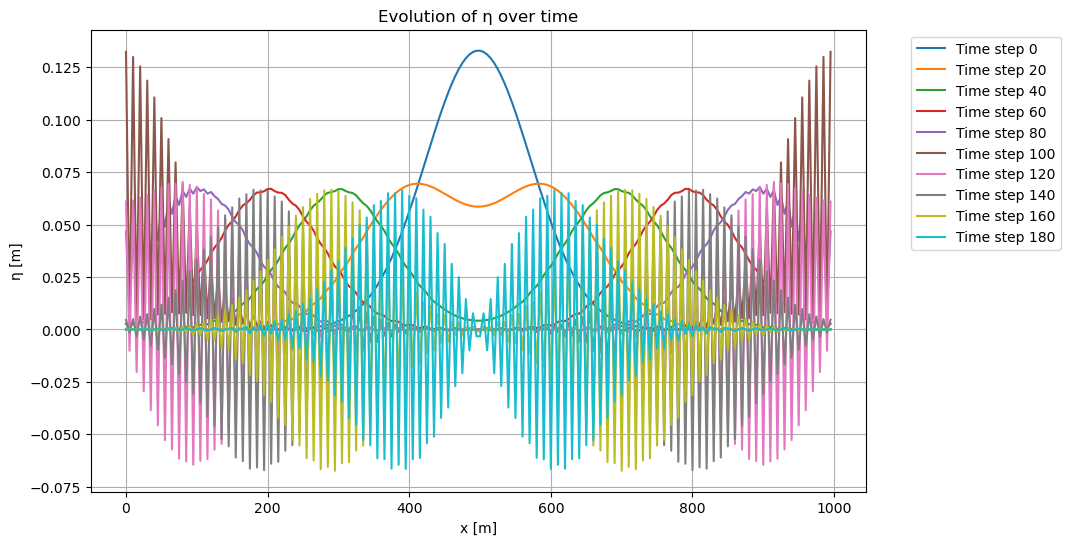

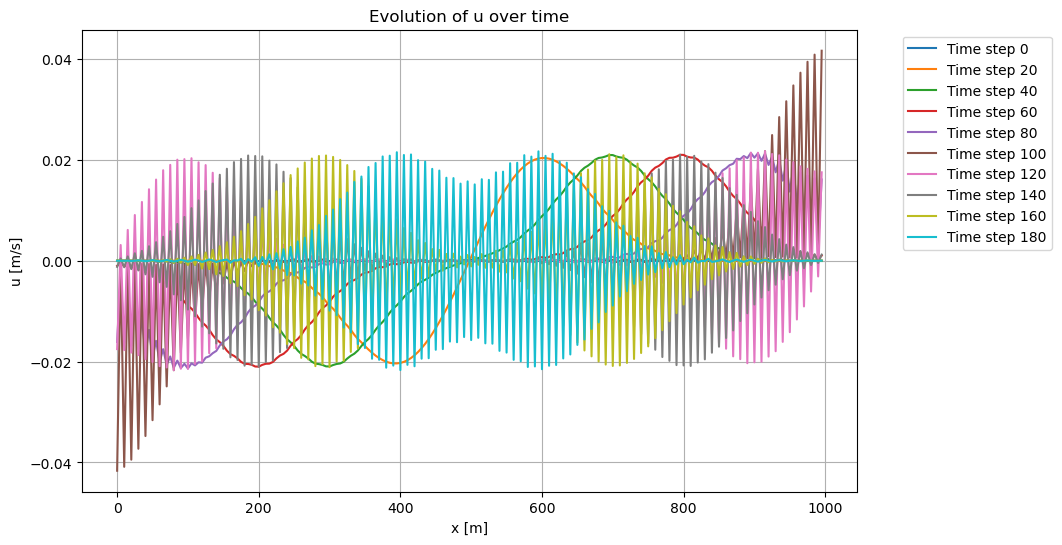

In [3]:
dt_2 = 0.1597 #critical value for dt
# Arrays to store results
eta_values_dt2 = np.zeros((num_steps, num_points)) # array in time and space domain
u_values_dt2 = np.zeros((num_steps, num_points)) # array in time and space domain

# Initialize with initial conditions
eta_values_dt2[0] = eta0 
eta_values_dt2[1] = eta0 # i had to define the next value to make it work. 
u_values_dt2[0] = u0

# Non-staggered CTCS scheme
for n in range(2, num_steps):
    
    # Defining the first and last space step
    u_values_dt2[n, 0] = u_values_dt2[n-2, 0] - g * dt_2 / dx * (eta_values_dt2[n-1, 1] - 0) # boundary for the first space steps
    eta_values_dt2[n,0] = eta_values_dt2[n-2, 0] - H * dt_2 / dx * (u_values_dt2[n-1,1] - 0)
    
    u_values_dt2[n, -1] = u_values_dt2[n-2, -1] - g * dt_2 / dx * (0 - eta_values_dt2[n-1, -2]) # boundary for the last space steps
    eta_values_dt2[n,-1] = eta_values_dt2[n-2, -1] - H * dt_2 / dx * (0 - u_values_dt2[n-1,-2])
    
    # Update u_values in space
    for i in range(1, num_points-1):
        u_values_dt2[n, i] = u_values_dt2[n-2, i] - g * dt_2 / dx * (eta_values_dt2[n-1, i+1] - eta_values_dt2[n-1, i-1])
    
    # Update eta_values in space
    for i in range(1, num_points-1):
        eta_values_dt2[n, i] = eta_values_dt2[n-2, i] - H * dt_2 / dx * (u_values_dt2[n-1, i+1] - u_values_dt2[n-1, i-1])


    

# Plotting eta values
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values_dt2[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True)
plt.show()

# Plotting u_values
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, u_values_dt2[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('u [m/s]')
plt.title('Evolution of u over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True)
plt.show()


### Testing a to large dt

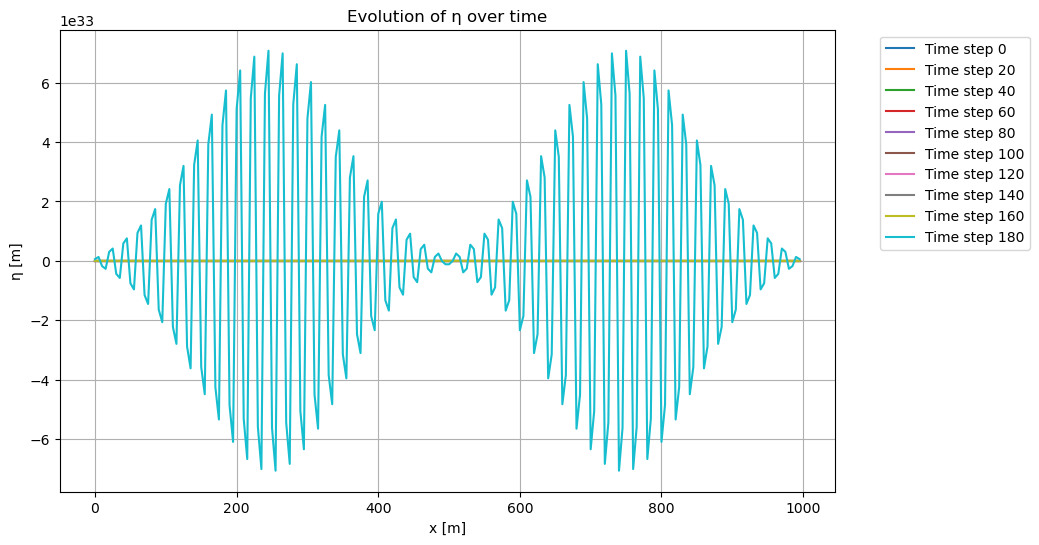

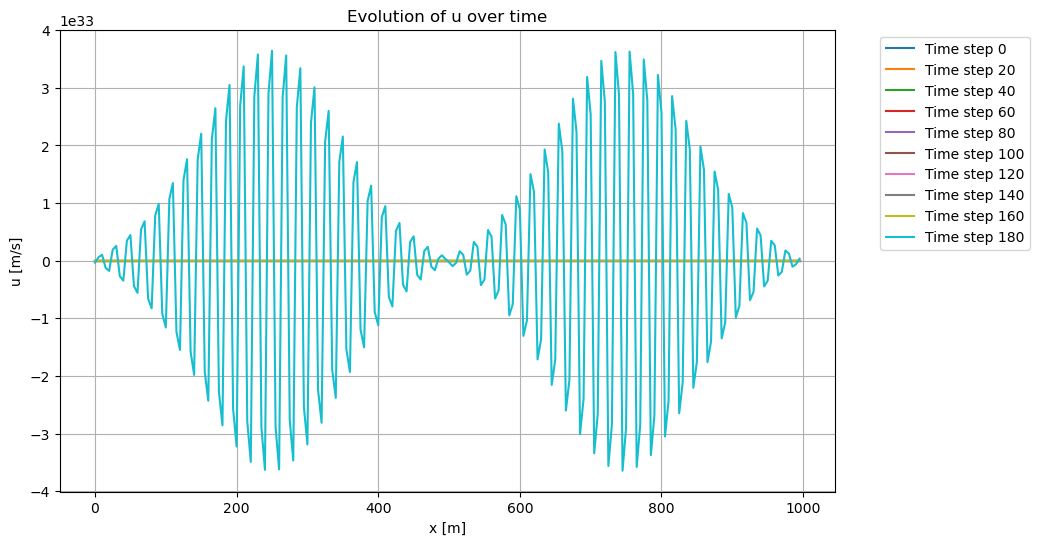

In [4]:
dt_3 = 0.18 # large dt, do not fulfill CFL criteria
# Arrays to store results
eta_values_dt3 = np.zeros((num_steps, num_points)) # array in time and space domain
u_values_dt3 = np.zeros((num_steps, num_points)) # array in time and space domain

# Initialize with initial conditions
eta_values_dt3[0] = eta0 
eta_values_dt3[1] = eta0 # i had to define the next value to make it work. 
u_values_dt3[0] = u0

# Non-staggered CTCS scheme
for n in range(2, num_steps):
    
    # Defining the first and last space step
    u_values_dt3[n, 0] = u_values_dt3[n-2, 0] - g * dt_3 / dx * (eta_values_dt3[n-1, 1] - 0) # boundary for the first space steps
    eta_values_dt3[n,0] = eta_values_dt3[n-2, 0] - H * dt_3 / dx * (u_values_dt3[n-1,1] - 0)
    
    u_values_dt3[n, -1] = u_values_dt3[n-2, -1] - g * dt_3 / dx * (0 - eta_values_dt3[n-1, -2]) # boundary for the last space steps
    eta_values_dt3[n,-1] = eta_values_dt3[n-2, -1] - H * dt_3 / dx * (0 - u_values_dt3[n-1,-2])
    
    # Update u_values_dt3 in space
    for i in range(1, num_points-1):
        u_values_dt3[n, i] = u_values_dt3[n-2, i] - g * dt_3 / dx * (eta_values_dt3[n-1, i+1] - eta_values_dt3[n-1, i-1])
    
    # Update eta_values_dt3 in space
    for i in range(1, num_points-1):
        eta_values_dt3[n, i] = eta_values_dt3[n-2, i] - H * dt_3 / dx * (u_values_dt3[n-1, i+1] - u_values_dt3[n-1, i-1])


# Plotting
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values_dt3[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True)
plt.show()

# Plotting u_values_dt3
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, u_values_dt3[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('u [m/s]')
plt.title('Evolution of u over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True)
plt.show()


After testing a number of different Δt, i ended up at a value of 0.08. At high time steps, after 120, the solution starts to become more irrational closer to the boundaries. If i use a Δt larger than 0.08, the solution for time step 180 starts giving negative $\eta$ values close to the boundaries. According to the CFL criteria, $\text{CFL} = \frac{\Delta t}{\Delta x} \cdot c \leq \text{CFL}_\text{max}$, a $\Delta x$ and $\Delta t$ of 5 and 0.08 respectivly, should satisfy the CLF-criteria. For a $\Delta t$ at the critical value of 0.1597 s many of the timesteps have many fluctuations, du to numerical error, and do not represent the wave signal very well. For a $\Delta t$ of 0.18 s, that do not fulfill the CFL criteria, both the sea surface elevation and the velocity blows up. 

Both $\eta$ and u are coupled variables, meaning that the change in one variable affects the other in a feedback loop. In the CTCS-scheme the next time step for each variable is dependent on the other variables previous and futrue place in space.

As the wave signal approches the boundaries the solution for high time stpes the sea surface elevation and velocity starts acting more irrational. The wave height grows and the speed increases. For higher $\Delta t$ the wave height gets negative and the speed changes direction. When analyzing the boundary conditions according to reality, one can think of the domain as a water tank. The boundaries can be looked as a wall. At higher time steps the wave signal will reach the boundaries with sea surface elevation and velocity higher than zero. At this cases it will not be realistic to have a boundary condition that makes the sea surface elevation and velocity be zero. In reality it would be reflection from the wave that affects the remaining signal. For the higher time steps it could look like this is the case. One can see that the time step of 180 in the plot with a $\Delta t$ of 0.1597 is almost back in the center. If the water tank is not closed, the water would diverge, and the signal would fade out of frame.

## Staggered grid in time and space FTBS 


\begin{equation}
u_{i+1/2}^{n+1} = u_{i+1/2}^n - \frac{g \Delta t}{\Delta x} (\eta_{i+1}^{n+1} - \eta_{i}^{n+1})
\end{equation}

\begin{equation}
\eta_{i}^{n+1} = \eta_{i}^n - \frac{H \Delta t}{\Delta x} (u_{i+1/2}^n - u_{i-1/2}^n)
\end{equation}

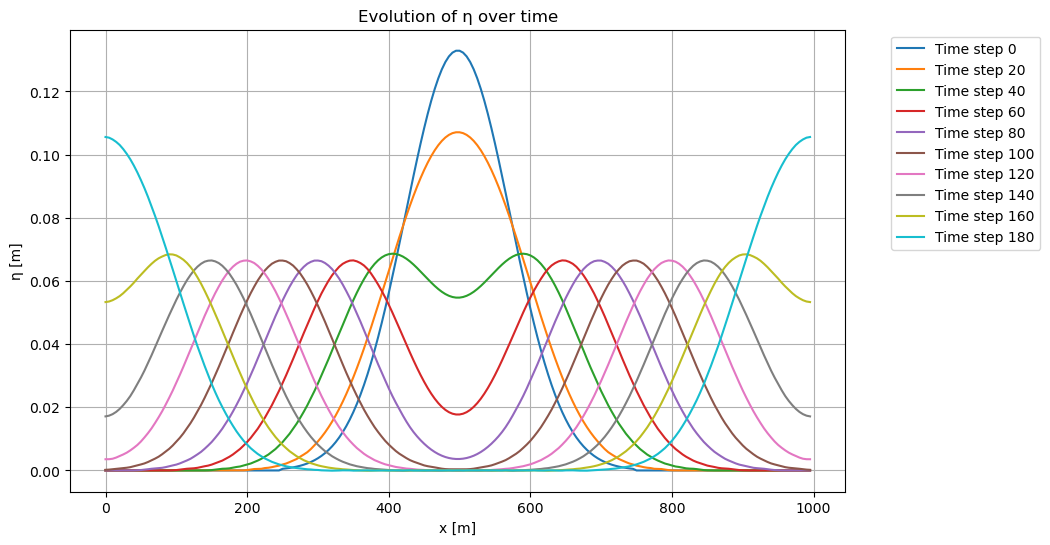

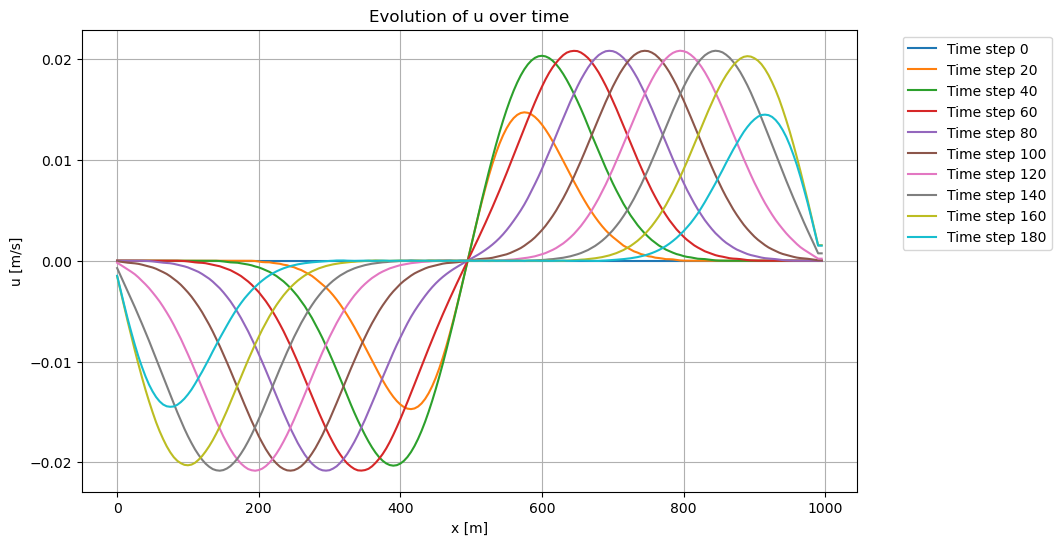

In [5]:

eta_values_2 = np.zeros((num_steps, num_points)) # Defines new arrays for the staggered signal
u_values_2 = np.zeros((num_steps, num_points))

# Initialize wit the same initial conditions as the non-staggered signal
eta_values_2[0] = eta0
u_values_2[0] = u0

for n in range(1, num_steps):
    # Update eta for all points except boundaries
    for i in range(1, num_points - 1):
        eta_values_2[n, i] = eta_values_2[n-1, i] - H * dt / dx * (u_values_2[n-1, i] - u_values_2[n-1, i-1])
        
    # Boundary conditions for eta
    eta_values_2[n, 0] = eta_values_2[n-1, 0] - H * dt / dx * (u_values_2[n-1, 0] - 0)
    eta_values_2[n, -1] = eta_values_2[n-1, -1] - H * dt / dx * (0 - u_values_2[n-1, -2])
    
    # Update u for all points except boundaries
    for i in range(1, num_points - 1):
        u_values_2[n, i] = u_values_2[n-1, i] - g * dt / dx * (eta_values_2[n, i+1] - eta_values_2[n, i])
    
    # Boundary conditions for u
    u_values_2[n, 0] = u_values_2[n-1, 0] - g * dt / dx * (eta_values_2[n, 1] - eta_values_2[n, 0])
    u_values_2[n, -1] = u_values_2[n-1, -1] - g * dt / dx * (eta_values_2[n, -1] - eta_values_2[n, -2])

# Plotting eta
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values_2[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plotting u
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, u_values_2[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('u [m/s]')
plt.title('Evolution of u over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



### Testing the critical dt

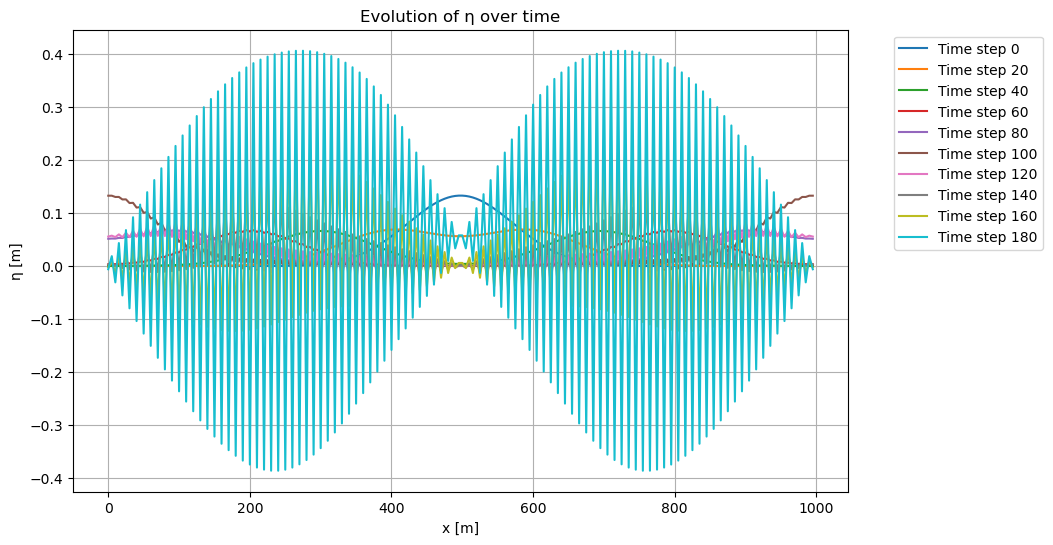

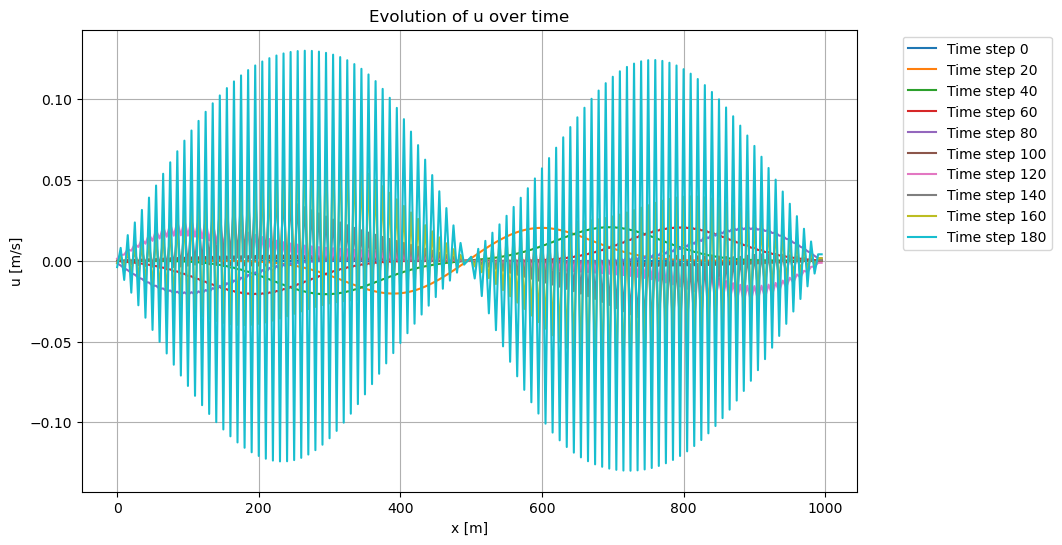

In [6]:
# With the critical dt value of 0.1597 s
# Define new arrays for the staggered signal
eta_values_staggered = np.zeros((num_steps, num_points))
u_values_staggered = np.zeros((num_steps, num_points))

# Initialize with the same initial conditions as the non-staggered signal
eta_values_staggered[0] = eta0
u_values_staggered[0] = u0

for n in range(1, num_steps):
    # Update eta for all points except boundaries
    for i in range(1, num_points - 1):
        eta_values_staggered[n, i] = eta_values_staggered[n-1, i] - H * dt_2 / dx * (u_values_staggered[n-1, i] - u_values_staggered[n-1, i-1])
        
    # Boundary conditions for eta
    eta_values_staggered[n, 0] = eta_values_staggered[n-1, 0] - H * dt_2 / dx * (u_values_staggered[n-1, 0] - 0)
    eta_values_staggered[n, -1] = eta_values_staggered[n-1, -1] - H * dt_2 / dx * (0 - u_values_staggered[n-1, -2])
    
    # Update u for all points except boundaries
    for i in range(1, num_points - 1):
        u_values_staggered[n, i] = u_values_staggered[n-1, i] - g * dt_2 / dx * (eta_values_staggered[n, i+1] - eta_values_staggered[n, i])
    
    # Boundary conditions for u
    u_values_staggered[n, 0] = u_values_staggered[n-1, 0] - g * dt_2 / dx * (eta_values_staggered[n, 1] - eta_values_staggered[n, 0])
    u_values_staggered[n, -1] = u_values_staggered[n-1, -1] - g * dt_2 / dx * (eta_values_staggered[n, -1] - eta_values_staggered[n, -2])

# Plotting eta
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values_staggered[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plotting u
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, u_values_staggered[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('u [m/s]')
plt.title('Evolution of u over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


When comparing the staggered solution to the non-staggered slolution, one can see that the staggered solution handles larger time steps better. The solution for the staggered does not start to fluctuate like the non-staggered did close to the boundaries. However, one can see that at higher time stpes like the time step of 180 has higher surface elevation close to the boundary, and the velocity is decreasing. Some of the differences between 1c and 1d could be because the use of different schemes. 1c uses CTCS and 1d uses FTBS. When using the critical value for $\Delta t$, the solution blows up for the higher time steps. 

###  modified the boundary conditions

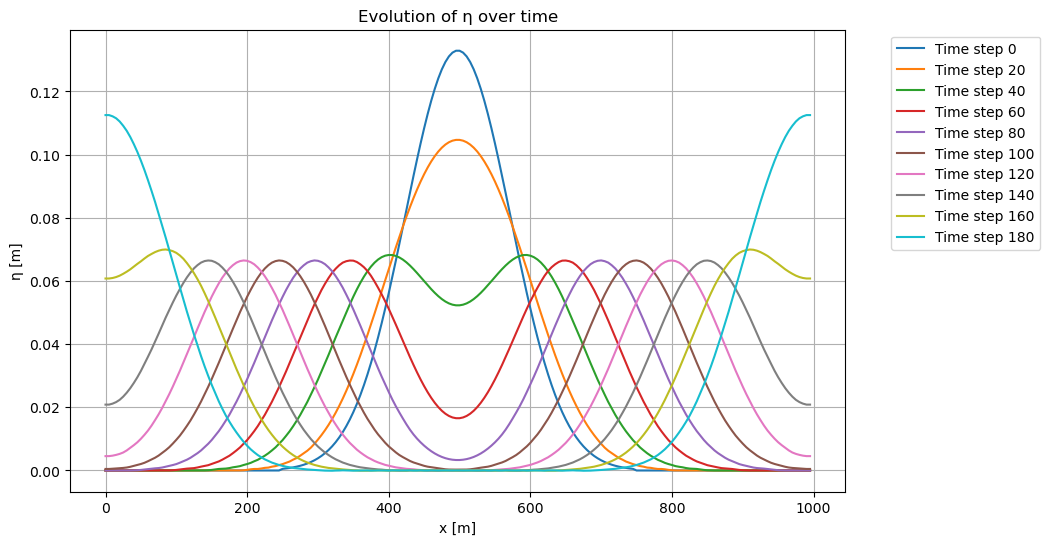

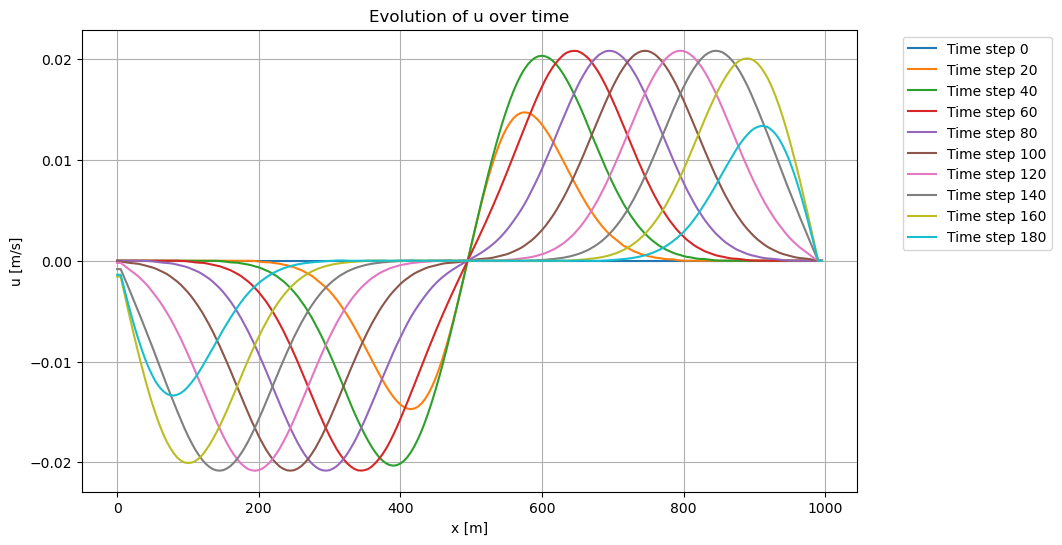

In [7]:
eta_values_3 = np.zeros((num_steps, num_points)) # Defines new arrays for the staggered signal
u_values_3 = np.zeros((num_steps, num_points))

# Initialize wit the same initial conditions as the non-staggered signal
eta_values_3[0] = eta0
u_values_3[0] = u0


# Initialize arrays for eta and u
eta_values_3 = np.zeros((num_steps, num_points))  # Defines new arrays for the staggered signal
u_values_3 = np.zeros((num_steps, num_points))

# Initialize with the same initial conditions as the non-staggered signal
eta_values_3[0] = eta0
u_values_3[0] = u0

for n in range(1, num_steps):
    # Update u and eta for all points except boundaries
    for i in range(1, num_points - 1):  # Adjusted range
        # Update u
        u_values_3[n, i] = u_values_3[n-1, i] - g * (dt / dx) * (eta_values_3[n-1, i+1] - eta_values_3[n-1, i])
        # Update eta
        eta_values_3[n, i] = eta_values_3[n-1, i] - H * (dt / dx) * (u_values_3[n, i] - u_values_3[n, i-1])
    
    # Using neighboring grid point values for  𝑢  and  𝜂 
    u_values_3[n, 0] = u_values_3[n, 1]  
    u_values_3[n, -1] = u_values_3[n, -2]  
    
    eta_values_3[n, 0] = eta_values_3[n, 1]  
    eta_values_3[n, -1] = eta_values_3[n, -2]  

# Plotting eta
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values_3[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plotting u
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, u_values_3[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('u [m/s]')
plt.title('Evolution of u over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

When changing to neighboring grid point values, the boundaries changes. The boundaries still has the value of zero, but as the time steps gets heigher, the signal gets more unrealistic. At time step 180 the wave height on the left side is higher than on the right side, as well as the speed of the wave. 

## Part 2

### Non-staggered CTCS scheme:

\begin{equation}
    \eta^{n+2}_i - 2 \eta^n_i + \eta^{n-2}_{i} = \frac{gH(\Delta t)^2}{(\Delta x)^2}(\eta^{n}_{i+2} - 2 \eta^n_i + \eta^{n}_{i-2})
\end{equation}

### Staggered in time and space FTCS scheme:

\begin{equation}
    \eta^{n+1}_i - 2 \eta^n_i + \eta^{n-1}_{i} = \frac{gH(\Delta t)^2}{(\Delta x)^2}(\eta^{n}_{i+1} - 2 \eta^n_i + \eta^{n}_{i-1})
\end{equation}


### Answer

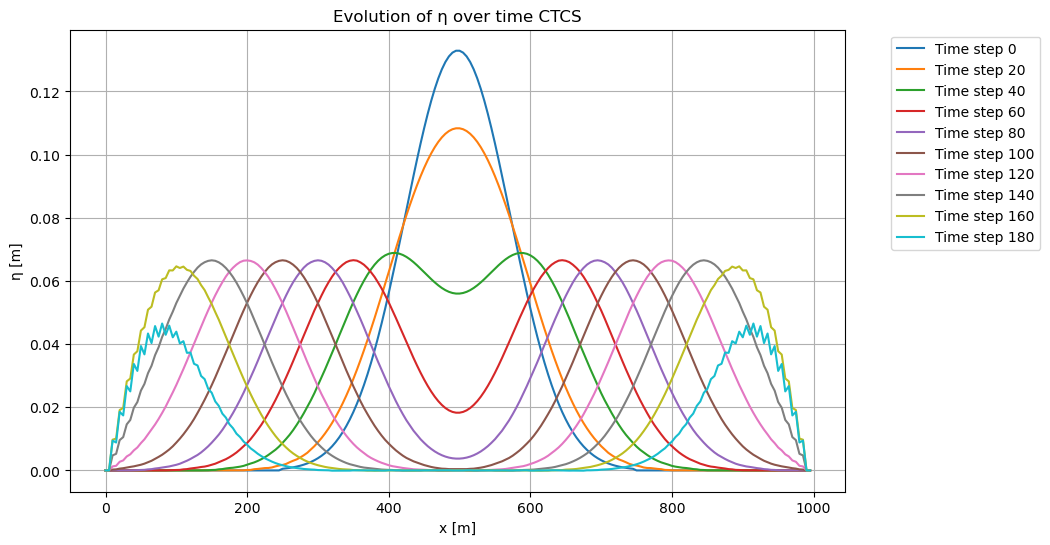

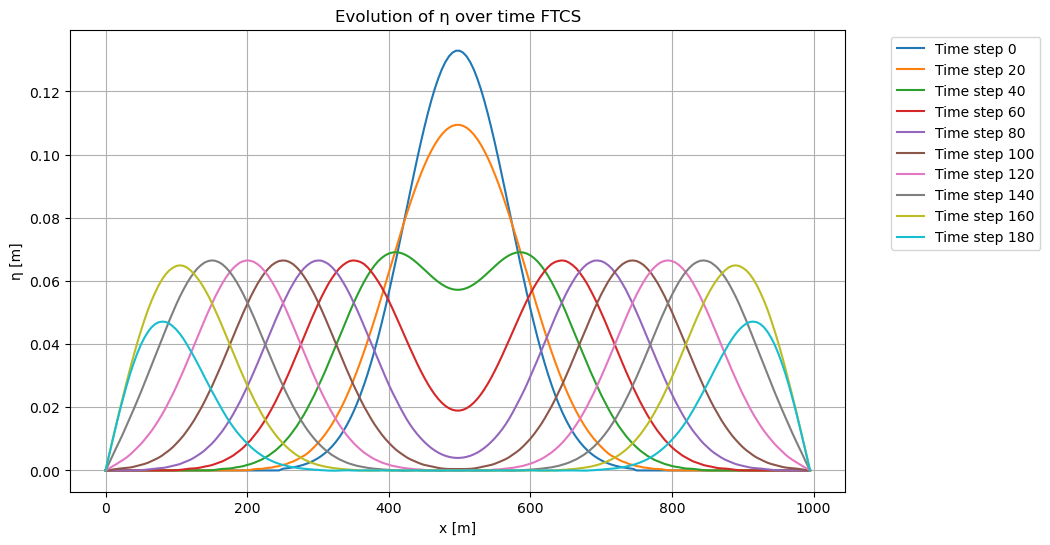

In [8]:
# Making arrays for the two schemes
ctsc = np.zeros(num_points)
ftcs = np.zeros(num_points)

# Gaussian wave signal
xbell = np.linspace(-10, 10, 100)
ybell = stats.norm.pdf(xbell, 0, 3)
ctsc[50:150] = ybell
ftcs[50:150] = ybell

# Time steps
num_steps = 200

# Arrays to store results
eta_values_ctcs = np.zeros((num_steps, num_points))
eta_values_ftcs = np.zeros((num_steps, num_points))
u_values = np.zeros((num_steps, num_points))

# Initialize with initial signal
eta_values_ctcs[0] = ctsc
eta_values_ftcs[0] = ftcs
u_values[0] = u0


for n in range(1, num_steps-2):
    for i in range(2, num_points - 2):
        eta_values_ctcs[n+2, i] = 2*eta_values_ctcs[n,i]-eta_values_ctcs[n-2,i] +((g*H*dt**2)/(dx**2))*(eta_values_ctcs[n,i+2]-2*eta_values_ctcs[n,i]+eta_values_ctcs[n,i-2])
        
        # Boundary conditons
        eta_values_ctcs[1,:] = eta_values_ctcs[0,:]
        eta_values_ctcs[2,:] = eta_values_ctcs[0,:]
for n in range(1, num_steps-2):
    for i in range(1, num_points - 1):         
        eta_values_ftcs[n+1,i] = 2*eta_values_ftcs[n,i]-eta_values_ftcs[n-1,i] +((g*H*dt**2)/(dx**2))*(eta_values_ftcs[n,i+1]-2*eta_values_ftcs[n,i]+eta_values_ftcs[n,i-1])
        
        #Boundary conditions
        eta_values_ftcs[1,:] = eta_values_ftcs[0,:]
        eta_values_ftcs[2,:] = eta_values_ftcs[0,:]
# Plotting
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values_ctcs[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time CTCS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(True)
plt.show()     

# Plotting
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values_ftcs[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time FTCS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(True)
plt.show()

### Testing critical dt

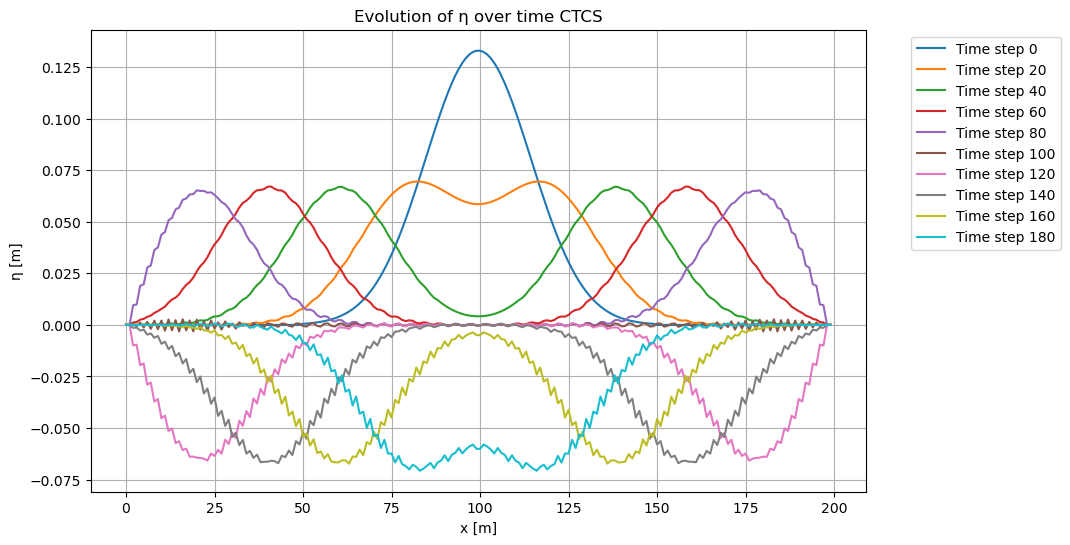

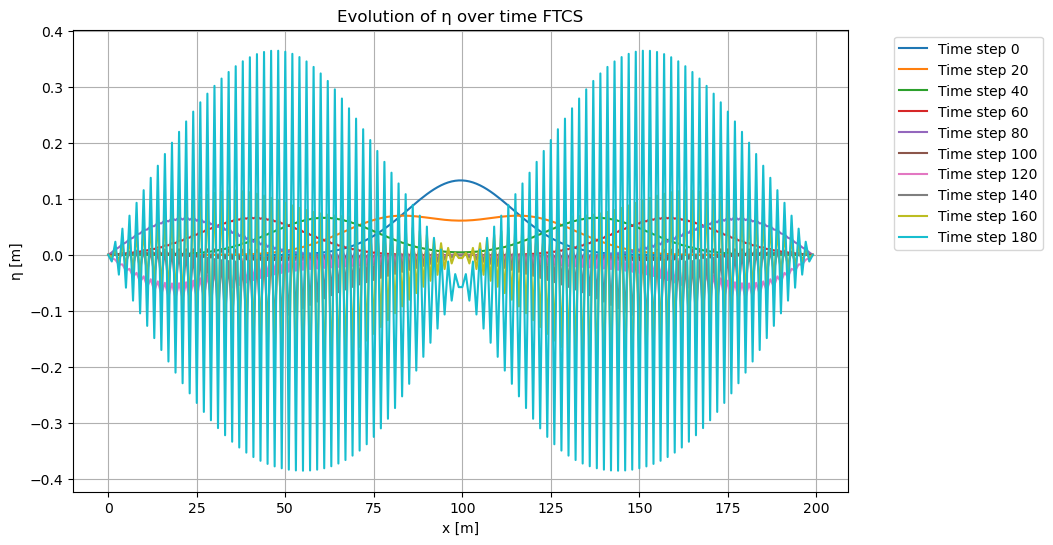

In [9]:
# Using dt = 0.1597 s
# Arrays to store results
eta_values_dtcs = np.zeros((num_steps, num_points))
eta_values_dftcs = np.zeros((num_steps, num_points))
u_values = np.zeros((num_steps, num_points))

# Initialize with initial signal
eta_values_dtcs[0] = ctsc
eta_values_dftcs[0] = ftcs

for n in range(1, num_steps - 2):
    for i in range(2, num_points - 2):
        eta_values_dtcs[n + 2, i] = 2 * eta_values_dtcs[n, i] - eta_values_dtcs[n - 2, i] + (
                    (g * H * dt_2 ** 2) / (dx ** 2)) * (
                                                eta_values_dtcs[n, i + 2] - 2 * eta_values_dtcs[n, i] +
                                                eta_values_dtcs[n, i - 2])

        # Boundary conditons
        eta_values_dtcs[1, :] = eta_values_dtcs[0, :]
        eta_values_dtcs[2, :] = eta_values_dtcs[0, :]
for n in range(1, num_steps - 2):
    for i in range(1, num_points - 1):
        eta_values_dftcs[n + 1, i] = 2 * eta_values_dftcs[n, i] - eta_values_dftcs[n - 1, i] + (
                    (g * H * dt_2 ** 2) / (dx ** 2)) * (
                                               eta_values_dftcs[n, i + 1] - 2 * eta_values_dftcs[n, i] +
                                               eta_values_dftcs[n, i - 1])

        # Boundary conditions
        eta_values_dftcs[1, :] = eta_values_dftcs[0, :]
        eta_values_dftcs[2, :] = eta_values_dftcs[0, :]

# Plotting
x = np.arange(num_points)
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values_dtcs[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time CTCS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
for n in range(0, num_steps, 20):
    plt.plot(x, eta_values_dftcs[n], label=f"Time step {n}")
plt.xlabel('x [m]')
plt.ylabel('η [m]')
plt.title('Evolution of η over time FTCS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

From the plots one can see that the CTCS solution fails to create a acurate wave signal at high time steps close to the boundaries. The FTCS scheme produces a more realistic solution, where the initlial wave signal fades out and decreses with higher time steps. However the CTCS handels a bigger $\Delta t$ better than the FTCS scheme. One can see that the CTCS gives negative surface elevation for high time steps, and the FTCS starts to blow up for higher time steps. 

Compared to the coupled equations, I would say that the FTCS creates more acurate signal, as it handles higher time steps better, and creats more realistic signal near the boundaries.

## Conclusion

In conclusion one can see that the staggered solution handles larger time steps better than the non-staggered. The solution for the staggered does not start to fluctuate like the non-staggered did close to the boundaries. Fot the wave equation one can see that the FTCS creats more accurat signals for smaller $\Delta t$, but CTCS works a little better for larger $\Delta t$.

## Reflection

In this assignment i have learned more about staggered schemes and how they work. At the start i did not understand quite what the meaning of staggering was, but now i have more understanding of it's use. My main take-home message is how to apply coupled and differented schemes to produce solutions, and how they work differently. 

This assignemnt is relevant to oceanograpgy/meteorology, because these fields often use staggered grid schemes to for example create ocean circulation models, or usesdifferented grid shcemes for shallow-water wave odeling, like this exercise.


The coding was somewhat difficult, I struggled a bit with the staggering part in the begining.  

I used ChatGPT to help with errors in my code. I also worked with some of the other students to compare solutions. I also used chapther 9 in Introduction to Geophysical Fluid Dynamics to learn more about staggered grids. 

# Refrences

OpenAI. (2024), ChatGPT (April 20 version) [Large language model]. https://chatgpt.com

Collins, S. N., James, R. S., Ray, P., Chen, K., Lassman, A., & Brownlee, J. (2013). Grids in numerical weather and climate models. Climate change and regional/local responses, 256.

Zingale. (2021). Advection Part I. Retrieved from https://zingale.github.io/comp_astro_tutorial/advection_euler/advection/advection-partI.html

Cushman-Roisin, B., & Beckers, J.-M. (2011). Chapter 9 - Barotropic waves. In B. Cushman-Roisin & J.-M. Beckers (Eds.), International Geophysics (Vol. 101, pp. 271-315). Academic Press. https://doi.org/10.1016/B978-0-12-088759-0.00009-2